In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [17]:
df = pd.read_csv('final_processed_ml_dataset.csv')
print('Dimension of dataset= ', df.shape)
df.head() # To get first n rows from the dataset default value of n is 5

Dimension of dataset=  (1104, 5)


,Floor Size(SQFT),Number of Rooms,Number of Bathroom,Cluster Label,Amount(BDT)
0,900,2,2,2,19000
1,900,2,2,2,19000
2,1610,3,4,2,50000
3,950,2,2,2,20000
4,1250,3,3,4,20000


In [18]:
# df = pd.read_csv('test_ml_dataset.csv')
# print('Dimension of dataset= ', df.shape)
# df.head() # To get first n rows from the dataset default value of n is 5

In [19]:
print(df.describe())

       Floor Size(SQFT)  Number of Rooms  Number of Bathroom  Cluster Label  \
count       1104.000000      1104.000000         1104.000000    1104.000000   
mean        1652.146739         2.951087            2.967391       4.027174   
std         1267.155717         1.131178            0.988981       2.740050   
min          300.000000         1.000000            0.000000       0.000000   
25%         1031.250000         3.000000            2.000000       2.000000   
50%         1400.000000         3.000000            3.000000       4.000000   
75%         2000.000000         3.000000            3.000000       6.000000   
max        25900.000000        21.000000           10.000000       9.000000   

        Amount(BDT)  
count  1.104000e+03  
mean   4.792518e+04  
std    8.869862e+04  
min    8.000000e+03  
25%    1.800000e+04  
50%    2.800000e+04  
75%    5.062500e+04  
max    2.100000e+06  


In [20]:
X = df.values[:, 0:4]  # get input values from first two columns
y = df.values[:, 4]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 1104 

X = [900   2   2   2] , y = 19000
X = [900   2   2   2] , y = 19000
X = [1610    3    4    2] , y = 50000
X = [950   2   2   2] , y = 20000
X = [1250    3    3    4] , y = 20000


In [21]:
from sklearn.model_selection import train_test_split
seed = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)

In [22]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train,y_train)
#model_ols.fit(X,y)
# fit() method is used for training the model
# Note the first parameter(feature) is must be 2D array(feature matrix)

C:\Users\cefalo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [23]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [24]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [    75.01899353   1997.48827268 -24210.16214996   1380.36464388]
intercept=  -15360.681081593139


In [25]:
predicted_rent = pd.DataFrame(model_ols.predict(X_test), columns=['Predicted Rent'])
actual_rent = pd.DataFrame(y_test)

In [26]:
predictedPrice = pd.DataFrame(model_ols.predict(X_test), columns=['Predicted Rent'])
# Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y_test, columns=['Actual Rent'])
actualPrice = actualPrice.reset_index(drop=True)
# Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
Actual Rent,107000.00000,75000.00000,21500.000000,18000.000000,30000.000000,55000.000000,30000.000000,25000.000000,33000.000000,20000.000000,...,11000.000000,305000.00000,25000.000000,60000.000000,18000.000000,20000.000000,35000.000000,24000.000000,80000.000000,17000.000000
Predicted Rent,171241.39596,101587.89955,8121.209593,21506.535594,33290.516865,99427.246395,42562.925117,25788.617512,23093.933032,8121.209593,...,-11023.683044,355241.03763,738.348775,55472.115475,20447.371314,13545.548094,17686.642026,32300.296476,56576.503433,16306.277382


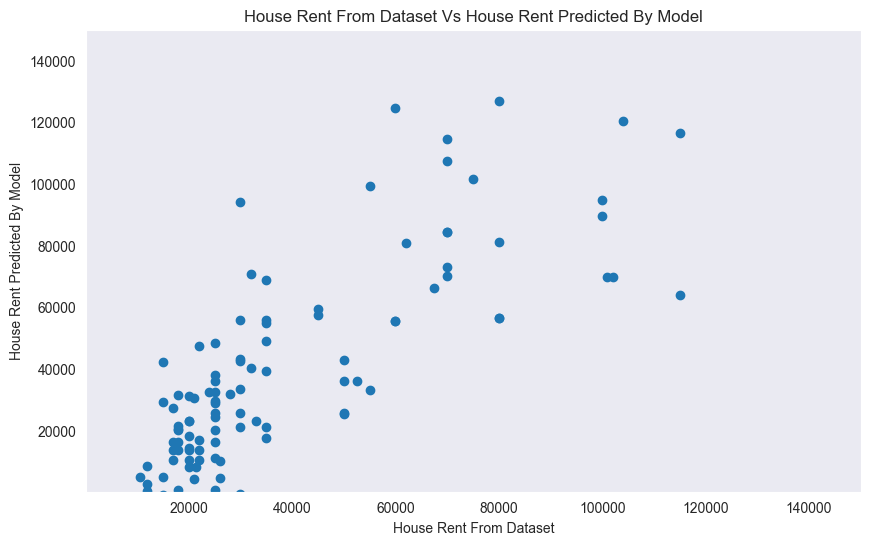

In [27]:
plt.scatter(y_test, model_ols.predict(X_test))
plt.xlabel('House Rent From Dataset')
plt.ylabel('House Rent Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("House Rent From Dataset Vs House Rent Predicted By Model")
plt.grid()
plt.xlim(100, 150000)
plt.ylim(100, 150000)
plt.show()


In [28]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
#
# #create Q-Q plot with 45-degree line added to plot
# fig = sm.qqplot(model_ols.predict(X_test), line='45')
# plt.show()

In [ ]:
import sklearn.metrics as sm
y_test_pred = model_ols.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))
#print(model_ols.predict(X_test))


In [34]:
import statsmodels.api as sm

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1487.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:05   Log-Likelihood:                -11791.
No. Observations:                 993   AIC:                         2.359e+04
Df Residuals:                     988   BIC:                         2.362e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.536e+04   5140.885     -2.988      0.0

In [35]:
'''Type,Lat,Lon,Floor_Size,Number_of_Rooms,Number_of_Bathroom'''
# create a model using coef and intercept
def calc(coef, intercept, input):
    print('coef: ', coef)
    print('intercept: ', intercept)
    pred = 0
    for i in range (len(coef)):
        pred = pred + coef[i]*input[i]
    pred =  pred + intercept
    return pred

#print(calc(model_ols.coef_, model_ols.intercept_, [1,23.874777,90.388188,900,2,2]))
print("Predicted rent: ", calc(model_ols.coef_, model_ols.intercept_, [900,2,2,1]), "Actual Rent: ", '19000')

coef:  [    75.01899353   1997.48827268 -24210.16214996   1380.36464388]
intercept:  -15360.681081593139
Predicted rent:  9111.42998195676 Actual Rent:  19000
